In [1]:
import os 
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data=pd.read_excel("Student Applications & Performance.xlsx")

## Data Cleaning

In [3]:
data.shape

(3400, 56)

In [4]:
#keeping the original data intact
data1=data.copy()

In [5]:
data1.describe()

STUDENT IDENTIFIER    STDNT_AGE  STDNT_TEST_ENTRANCE1  \
count        3.400000e+03  3400.000000           1106.000000   
mean         7.897155e+06    17.994118             20.660036   
std          8.083421e+04     0.552052              3.234734   
min          7.755837e+06    16.000000              8.000000   
25%          7.827039e+06    18.000000             18.000000   
50%          7.899052e+06    18.000000             20.000000   
75%          7.964008e+06    18.000000             22.000000   
max          8.037098e+06    26.000000             32.000000   

       STDNT_TEST_ENTRANCE2  STDNT_TEST_ENTRANCE_COMB     FIRST_TERM  \
count           2492.000000               2882.000000    3400.000000   
mean             965.092295                997.758501  200777.000000   
std              209.088633                156.268221     170.001298   
min              350.000000                530.000000  200508.000000   
25%              900.000000                910.000000  200608.000000   
50%              990.000000                990.000000  200808.000000   
75%             1100.000000               1110.000000  200908.000000   
max             1490.000000               1510.000000  201008.000000   

         SECOND_TERM  RETURNED_2ND_YR  DISTANCE_FROM_HOME  HIGH_SCHL_GPA  \
count    3400.000000      3400.000000         3375.000000    3347.000000   
mean   200871.000000         0.787353           99.825185       3.202738   
std       170.001298         0.409240          235.196984       0.455337   
min    200602.000000         0.000000            0.000000       0.000000   
25%    200702.000000         1.000000           69.000000       2.870000   
50%    200902.000000         1.000000           69.000000       3.200000   
75%    201002.000000         1.000000          138.000000       3.560000   
max    201102.000000         1.000000         5932.000000       4.000000   

       FATHER_HI_EDU_CD  MOTHER_HI_EDU_CD  FIRST_TERM_ATTEMPT_HRS  \
count       2968.000000       2911.000000             3400.000000   
mean           2.560647          2.571281               13.985882   
std            0.681273          0.611729                1.554286   
min            1.000000          1.000000                9.000000   
25%            2.000000          2.000000               13.000000   
50%            3.000000          3.000000               14.000000   
75%            3.000000          3.000000               15.000000   
max            4.000000          4.000000               21.000000   

       FIRST_TERM_EARNED_HRS  SECOND_TERM_ATTEMPT_HRS  SECOND_TERM_EARNED_HRS  \
count            3400.000000              3194.000000             3191.000000   
mean               12.205000                14.285848               12.511125   
std                 2.986294                 2.104387                3.470492   
min                 0.000000                 2.000000                0.000000   
25%                11.000000                13.000000               11.000000   
50%                13.000000                14.000000               13.000000   
75%                15.000000                16.000000               15.000000   
max                21.000000                23.000000               23.000000   

       GROSS_FIN_NEED  COST_OF_ATTEND  EST_FAM_CONTRIBUTION    UNMET_NEED  
count    3.400000e+03    3.400000e+03          3.400000e+03  3.400000e+03  
mean     3.034025e+05    5.515335e+05          3.446899e+05  7.222052e+04  
std      4.836255e+05    6.064403e+05          7.871878e+05  2.795679e+05  
min      0.000000e+00    0.000000e+00          0.000000e+00 -1.212072e+06  
25%      0.000000e+00    0.000000e+00          0.000000e+00  0.000000e+00  
50%      0.000000e+00    1.505400e+05          0.000000e+00  0.000000e+00  
75%      5.995800e+05    1.192815e+06          3.241800e+05  1.876155e+05  
max      2.124900e+06    2.124900e+06          5.999940e+06  1.632660e+06

In [6]:
data1.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [7]:
ind1=data1[data1['STDNT_TEST_ENTRANCE_COMB'].isnull()].index

In [8]:
# replacing the missing values with median
data1['STDNT_TEST_ENTRANCE_COMB'].fillna(990, inplace=True)

In [9]:
#removing these coloumns as we have the combined score
data1=data1.drop(['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2'],axis=1)

In [10]:
#replacing with median
data1['HIGH_SCHL_GPA'].fillna(3.2, inplace=True)

In [11]:
data1['DISTANCE_FROM_HOME'].fillna(69, inplace=True)

In [12]:
data1['FATHER_HI_EDU_CD'].fillna(4, inplace=True)

In [13]:
data1.loc[(data1.FATHER_HI_EDU_DESC == 'No Information'),'FATHER_HI_EDU_DESC']='Other/Unknown'

In [14]:
data1.loc[(data1.MOTHER_HI_EDU_DESC == 'No Information'),'MOTHER_HI_EDU_DESC']='Other/Unknown'

In [15]:
data1['MOTHER_HI_EDU_CD'].fillna(4, inplace=True)

In [16]:
data1['SECOND_TERM_ATTEMPT_HRS'].fillna(14, inplace=True)

In [17]:
data1['SECOND_TERM_EARNED_HRS'].fillna(13, inplace=True)

In [18]:
ind2=data1['HIGH_SCHL_NAME'].isnull()

In [19]:
#creating a boolean object for rows containing specific missing values
bool_series=pd.isnull(data1['CORE_COURSE_GRADE_1_S'])

In [20]:
# Storing indices
ind11=data1[bool_series]['CORE_COURSE_NAME_1_S'].dropna().index

In [21]:
#replacing the concerned missing values

data1.loc[ind11,'CORE_COURSE_GRADE_1_S']='C'

In [22]:
#Dropping as only one value is missing
data1=data1.drop([data1.index[245]],axis=0)

In [23]:
data1.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE_COMB       0
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2754
CORE_COURSE_GRADE_5_F       2754
CORE_COURSE_NAME_6_F        3271
CORE_COURSE_GRADE_6_F       3271
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        157
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1037
CORE_COURSE_GRADE_3_S       1037
CORE_COURSE_NAME_4_S        2044
CORE_COURS

In [24]:
#Even though missing values are higher, dropping columns doesn't make sense as it is not actually missing but
# those studens have not picked any subjects that's why it is missing so will impute it as "not picked"


Cols=['CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_4_F',
     'CORE_COURSE_NAME_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S',
     'CORE_COURSE_NAME_3_S','CORE_COURSE_NAME_4_S','CORE_COURSE_NAME_5_S','CORE_COURSE_NAME_6_S']

In [25]:
data1[Cols]=data1[Cols].fillna('Not picked')

In [26]:
Col1=['CORE_COURSE_GRADE_2_F', 
       'CORE_COURSE_GRADE_3_F',
       'CORE_COURSE_GRADE_4_F', 
       'CORE_COURSE_GRADE_5_F', 
       'CORE_COURSE_GRADE_6_F', 
       'CORE_COURSE_GRADE_1_S', 
       'CORE_COURSE_GRADE_2_S', 
       'CORE_COURSE_GRADE_3_S', 
       'CORE_COURSE_GRADE_4_S', 
       'CORE_COURSE_GRADE_5_S', 
       'CORE_COURSE_GRADE_6_S']

In [27]:
data1[Col1]=data1[Col1].fillna('NA')

In [28]:
data1.isnull().sum()

STUDENT IDENTIFIER          0
STDNT_AGE                   0
STDNT_GENDER                0
STDNT_BACKGROUND            0
IN_STATE_FLAG               0
INTERNATIONAL_STS           0
STDNT_MAJOR                 0
STDNT_MINOR                 0
STDNT_TEST_ENTRANCE_COMB    0
FIRST_TERM                  0
CORE_COURSE_NAME_1_F        0
CORE_COURSE_GRADE_1_F       0
CORE_COURSE_NAME_2_F        0
CORE_COURSE_GRADE_2_F       0
CORE_COURSE_NAME_3_F        0
CORE_COURSE_GRADE_3_F       0
CORE_COURSE_NAME_4_F        0
CORE_COURSE_GRADE_4_F       0
CORE_COURSE_NAME_5_F        0
CORE_COURSE_GRADE_5_F       0
CORE_COURSE_NAME_6_F        0
CORE_COURSE_GRADE_6_F       0
SECOND_TERM                 0
CORE_COURSE_NAME_1_S        0
CORE_COURSE_GRADE_1_S       0
CORE_COURSE_NAME_2_S        0
CORE_COURSE_GRADE_2_S       0
CORE_COURSE_NAME_3_S        0
CORE_COURSE_GRADE_3_S       0
CORE_COURSE_NAME_4_S        0
CORE_COURSE_GRADE_4_S       0
CORE_COURSE_NAME_5_S        0
CORE_COURSE_GRADE_5_S       0
CORE_COURS

In [29]:
#creating a copy for imputing course grades into one variable as mode
data2=data1.copy()

In [30]:
#replacing 0 and 1 in both the data sets so that 1 indicates student leaving
data1['RETURNED_2ND_YR']=data1['RETURNED_2ND_YR'].replace({0:1,1:0})
data2['RETURNED_2ND_YR']=data2['RETURNED_2ND_YR'].replace({0:1,1:0})

In [31]:
grade1=data2[['CORE_COURSE_GRADE_1_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_GRADE_3_F',
             'CORE_COURSE_GRADE_4_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_GRADE_6_F']].mode(axis=1)

In [32]:
grade1

0    1    2    3    4    5
0      A  NaN  NaN  NaN  NaN  NaN
1      A  NaN  NaN  NaN  NaN  NaN
2      A  NaN  NaN  NaN  NaN  NaN
3     NA  NaN  NaN  NaN  NaN  NaN
4      A  NaN  NaN  NaN  NaN  NaN
...   ..  ...  ...  ...  ...  ...
3395  NA  NaN  NaN  NaN  NaN  NaN
3396  NA  NaN  NaN  NaN  NaN  NaN
3397  NA  NaN  NaN  NaN  NaN  NaN
3398  NA  NaN  NaN  NaN  NaN  NaN
3399  NA  NaN  NaN  NaN  NaN  NaN

[3399 rows x 6 columns]

In [33]:
grade1.isnull().sum()

0       0
1    2391
2    3198
3    3395
4    3395
5    3395
dtype: int64

In [34]:
grade1=grade1.drop([1,2,3,4,5],axis=1)

In [35]:
#crerating a variable with mode values of grades in first term
data2['Average_grade_F']=grade1

In [36]:
grade2=data2[['CORE_COURSE_GRADE_1_S',
       'CORE_COURSE_GRADE_2_S',
       'CORE_COURSE_GRADE_3_S', 
       'CORE_COURSE_GRADE_4_S',
       'CORE_COURSE_GRADE_5_S',
       'CORE_COURSE_GRADE_6_S']].mode(axis=1)

In [37]:
grade2.isnull().sum()

0       0
1    2655
2    3244
3    3398
4    3398
5    3398
dtype: int64

In [38]:
grade2=grade2.drop([1,2,3,4,5],axis=1)

In [39]:
#crerating a variable with mode values of grades in second term
data2['Average_grade_S']=grade2

In [40]:
# Dropping following variables as we not have the mode grade column, this is done to avoid curse of dimensions
data2=data2.drop(['CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
       'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F','CORE_COURSE_GRADE_6_F'],axis=1)

In [41]:
data2=data2.drop(['CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S',
       'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S',
       'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S',
       'CORE_COURSE_GRADE_6_S'],axis=1)

In [42]:
data2.shape

(3399, 32)

In [43]:
# Converting GPA into categorical
data2['HIGH_SCHL_GPA'].describe()

count    3399.000000
mean        3.202696
std         0.451840
min         0.000000
25%         2.870000
50%         3.200000
75%         3.550000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

In [44]:
def label (x):
    if x<=2.87:
        return 'Low'
    elif x<=3.2:
        return 'Med'
    else:
        return 'High'

In [45]:
data2['HIGH_SCHL_GPA']=data2['HIGH_SCHL_GPA'].map(label)

In [46]:
data2['STDNT_TEST_ENTRANCE_COMB'].describe()

count    3399.000000
mean      996.498970
std       143.846038
min       530.000000
25%       910.000000
50%       990.000000
75%      1070.000000
max      1510.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [47]:
#converting Entrance score in categorical
data2['STDNT_TEST_ENTRANCE_COMB'].describe()

count    3399.000000
mean      996.498970
std       143.846038
min       530.000000
25%       910.000000
50%       990.000000
75%      1070.000000
max      1510.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [48]:
def label1 (x):
    if x<=910:
        return 'Low'
    elif x<=990:
        return 'Med'
    else:
        return 'High'

In [49]:
data2['STDNT_TEST_ENTRANCE_COMB']=data2['STDNT_TEST_ENTRANCE_COMB'].map(label1)

# EDA

## Categorical Variables

In [50]:
categorical_features=[feature for feature in data2.columns if data2[feature].dtypes=='O']
len(categorical_features)

16

In [51]:
# Following variables are categorical in nature
categorical_features

['STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_MINOR',
 'STDNT_TEST_ENTRANCE_COMB',
 'HOUSING_STS',
 'HIGH_SCHL_GPA',
 'HIGH_SCHL_NAME',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC',
 'Average_grade_F',
 'Average_grade_S']

In [52]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data2[feature].unique())))

The feature is STDNT_GENDER and number of categories are 2
The feature is STDNT_BACKGROUND and number of categories are 8
The feature is IN_STATE_FLAG and number of categories are 2
The feature is INTERNATIONAL_STS and number of categories are 2
The feature is STDNT_MAJOR and number of categories are 54
The feature is STDNT_MINOR and number of categories are 37
The feature is STDNT_TEST_ENTRANCE_COMB and number of categories are 3
The feature is HOUSING_STS and number of categories are 2
The feature is HIGH_SCHL_GPA and number of categories are 3
The feature is HIGH_SCHL_NAME and number of categories are 439
The feature is FATHER_HI_EDU_DESC and number of categories are 4
The feature is MOTHER_HI_EDU_DESC and number of categories are 4
The feature is DEGREE_GROUP_CD and number of categories are 3
The feature is DEGREE_GROUP_DESC and number of categories are 3
The feature is Average_grade_F and number of categories are 7
The feature is Average_grade_S and number of categories are 7


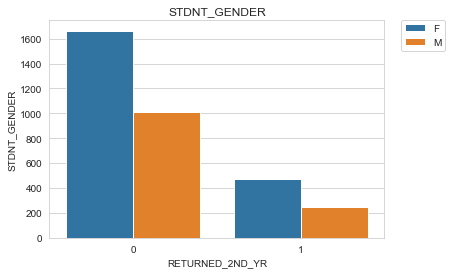

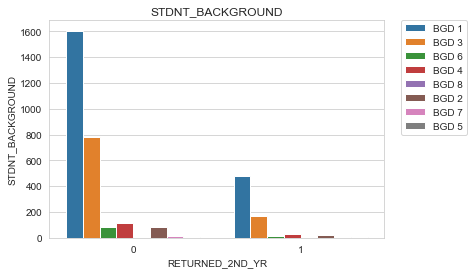

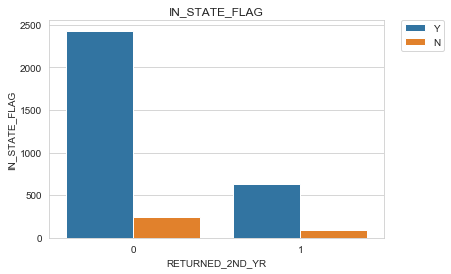

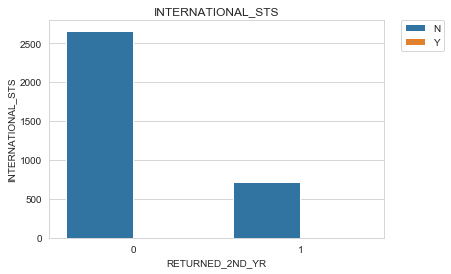

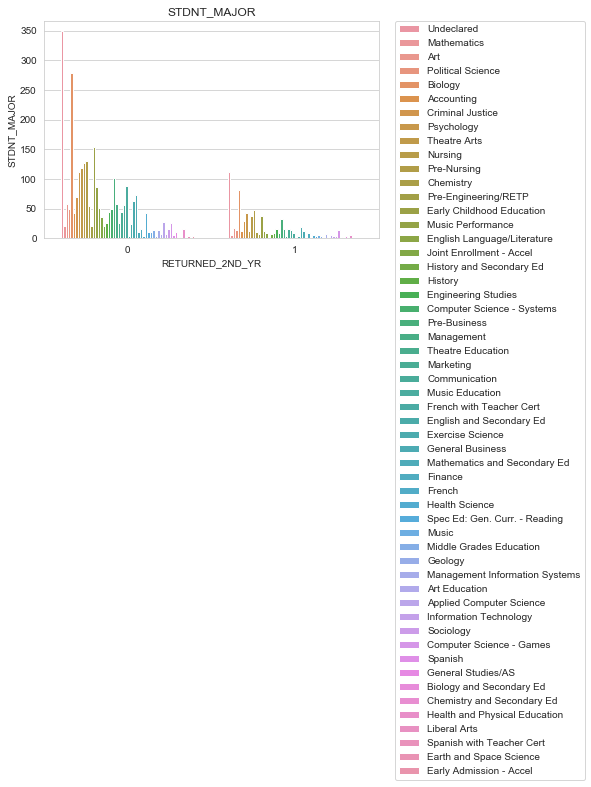

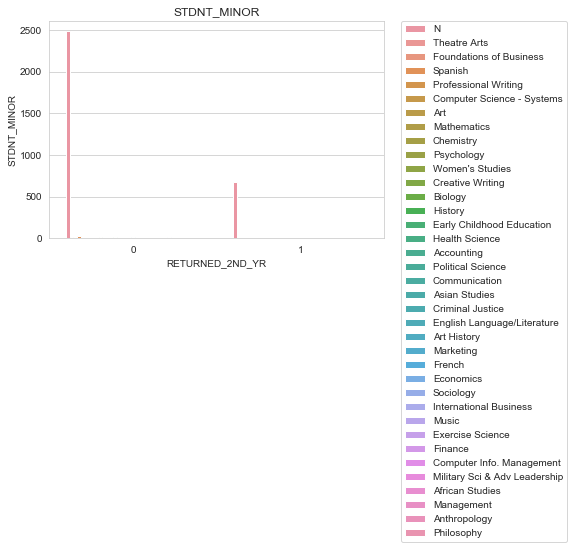

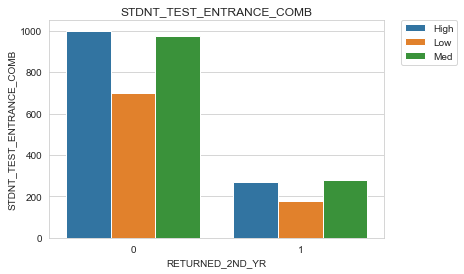

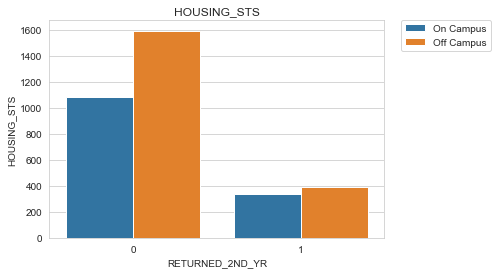

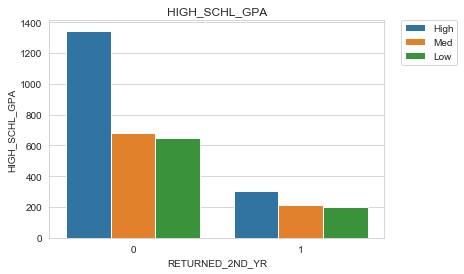

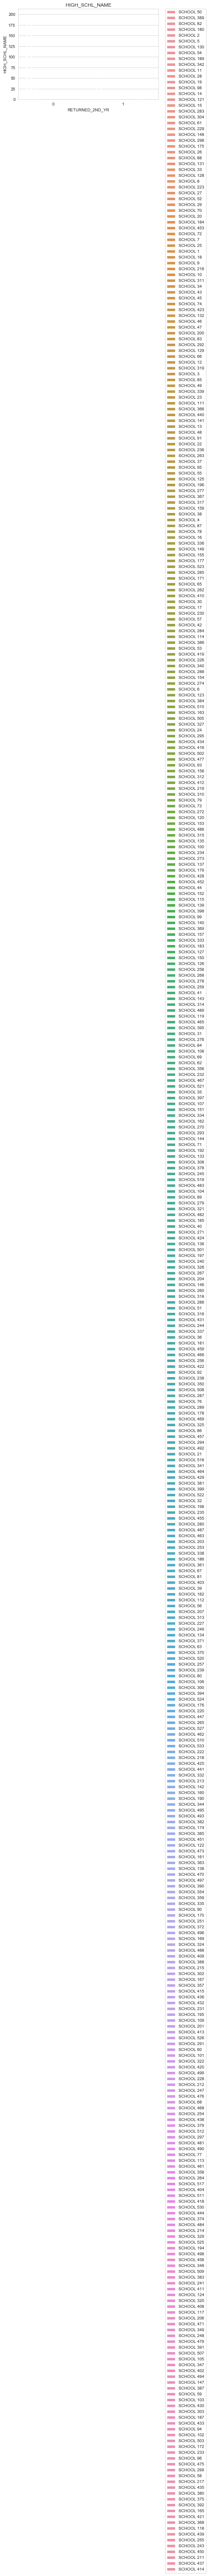

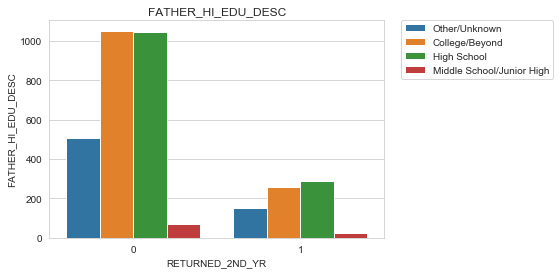

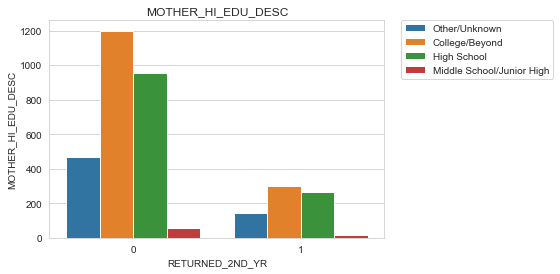

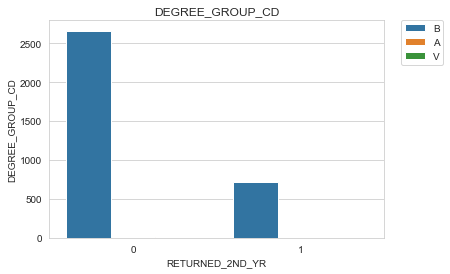

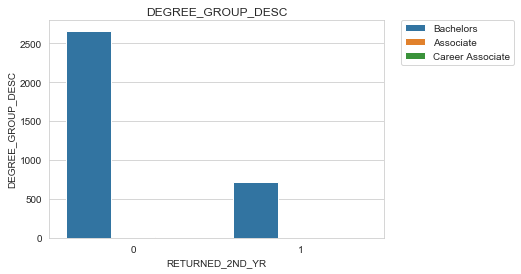

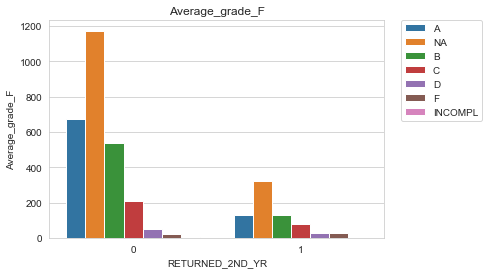

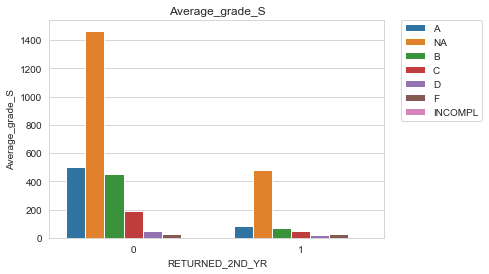

In [53]:
for feature in categorical_features:
    data=data2.copy()
    plt.figure()
    sns.set_style('whitegrid')
    sns.countplot(x='RETURNED_2ND_YR',hue=feature,data=data2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('RETURNED_2ND_YR')
    plt.ylabel(feature)
    plt.title(feature)

In [54]:
# Observation: As evident from the graphs above, both the groups, 0 and 1 are behaving almost similar across variables
# except there is a slight difference in GPA and Housing status, so let's explore that further

data2.groupby(["RETURNED_2ND_YR","HIGH_SCHL_GPA"],as_index=False).agg("size")

RETURNED_2ND_YR  HIGH_SCHL_GPA
0                High             1345
                 Low               650
                 Med               681
1                High              306
                 Low               201
                 Med               216
dtype: int64

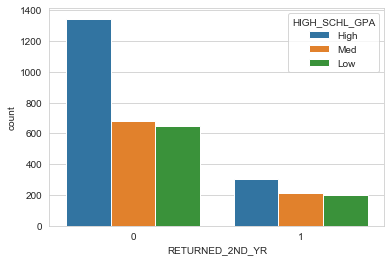

In [55]:
#students with "High" GPA are less likely to attrite 

sns.set_style('whitegrid')
sns.countplot(x='RETURNED_2ND_YR',hue='HIGH_SCHL_GPA',data=data2)

In [56]:
# students staying on campus are more likely to attrite
data2.groupby(["RETURNED_2ND_YR","HOUSING_STS"],as_index=False).agg("size")

RETURNED_2ND_YR  HOUSING_STS
0                Off Campus     1592
                 On Campus      1084
1                Off Campus      389
                 On Campus       334
dtype: int64

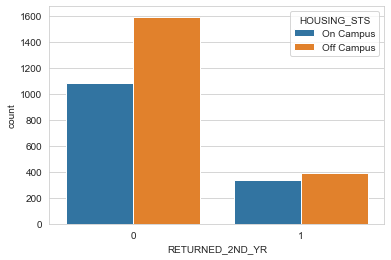

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='RETURNED_2ND_YR',hue='HOUSING_STS',data=data2)

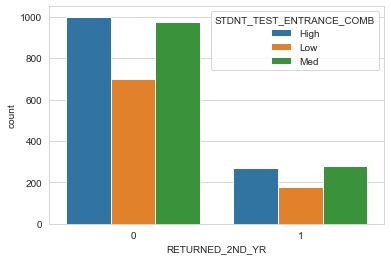

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='RETURNED_2ND_YR',hue='STDNT_TEST_ENTRANCE_COMB',data=data2)

In [150]:
data2.groupby(["RETURNED_2ND_YR","STDNT_TEST_ENTRANCE_COMB"],as_index=False).agg("size")

RETURNED_2ND_YR  STDNT_TEST_ENTRANCE_COMB
0                High                        1000
                 Low                          701
                 Med                          975
1                High                         269
                 Low                          177
                 Med                          277
dtype: int64

In [152]:
pd.crosstab(data2["RETURNED_2ND_YR"],data2["STDNT_TEST_ENTRANCE_COMB"]).apply(lambda r: r/r.sum(), axis=1)

STDNT_TEST_ENTRANCE_COMB      High       Low       Med
RETURNED_2ND_YR                                       
0                         0.373692  0.261958  0.364350
1                         0.372061  0.244813  0.383126

In [146]:
pd.crosstab(data2["RETURNED_2ND_YR"],data2["FIRST_TERM"]).apply(lambda r: r/r.sum(), axis=0)

FIRST_TERM        200508    200608    200708    200808    200908    201008
RETURNED_2ND_YR                                                           
0                0.78499  0.842742  0.786948  0.772806  0.769231  0.778481
1                0.21501  0.157258  0.213052  0.227194  0.230769  0.221519

## Continuous Variables

In [59]:
# list of numerical variables
numerical_features = [feature for feature in data1.columns if data1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data1[numerical_features].head()

Number of numerical variables:  18


STUDENT IDENTIFIER  STDNT_AGE  STDNT_TEST_ENTRANCE_COMB  FIRST_TERM  \
0             7808615         18                    1150.0      200708   
1             7830063         19                    1190.0      200808   
2             7847538         18                    1030.0      201008   
3             8006429         18                    1220.0      200708   
4             7962680         18                    1190.0      200808   

   SECOND_TERM  RETURNED_2ND_YR  DISTANCE_FROM_HOME  HIGH_SCHL_GPA  \
0       200802                1               150.0           4.00   
1       200902                0                69.0           2.89   
2       201102                0               150.0           3.39   
3       200802                0               150.0           2.93   
4       200902                0                69.0           3.86   

   FATHER_HI_EDU_CD  MOTHER_HI_EDU_CD  FIRST_TERM_ATTEMPT_HRS  \
0               4.0               4.0                      16   
1               3.0               3.0                      18   
2               2.0               4.0                      15   
3               3.0               3.0                      13   
4               3.0               2.0                      12   

   FIRST_TERM_EARNED_HRS  SECOND_TERM_ATTEMPT_HRS  SECOND_TERM_EARNED_HRS  \
0                     16                     14.0                    14.0   
1                     18                     18.0                    18.0   
2                     15                     14.0                    14.0   
3                     13                     14.0                    14.0   
4                     12                     12.0                    12.0   

   GROSS_FIN_NEED  COST_OF_ATTEND  EST_FAM_CONTRIBUTION  UNMET_NEED  
0               0               0                     0         0.0  
1          570000         1355760                785760    459300.0  
2               0               0                     0         0.0  
3               0               0                     0         0.0  
4          835920         1355760                519840    278340.0

In [60]:
# Discrete variables
discrete_feature=[feature for feature in numerical_features if len(data1[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 11


In [61]:
discrete_feature

['STDNT_AGE',
 'STDNT_TEST_ENTRANCE_COMB',
 'FIRST_TERM',
 'SECOND_TERM',
 'RETURNED_2ND_YR',
 'FATHER_HI_EDU_CD',
 'MOTHER_HI_EDU_CD',
 'FIRST_TERM_ATTEMPT_HRS',
 'FIRST_TERM_EARNED_HRS',
 'SECOND_TERM_ATTEMPT_HRS',
 'SECOND_TERM_EARNED_HRS']

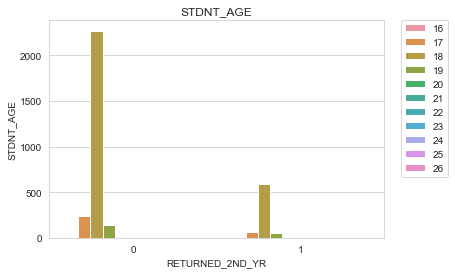

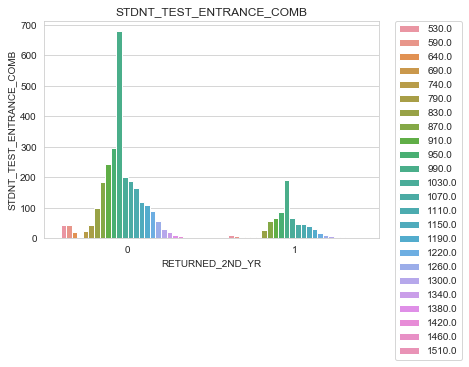

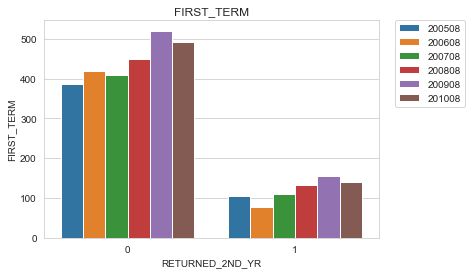

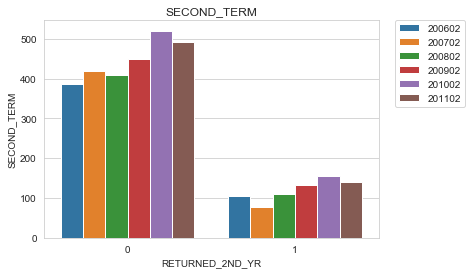

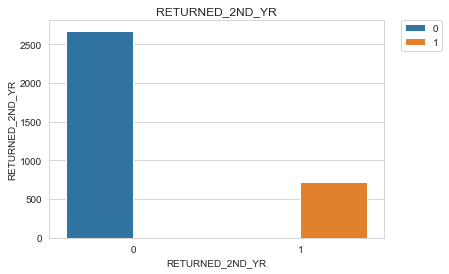

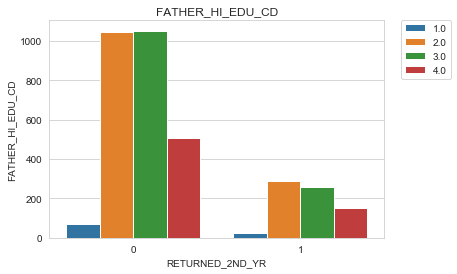

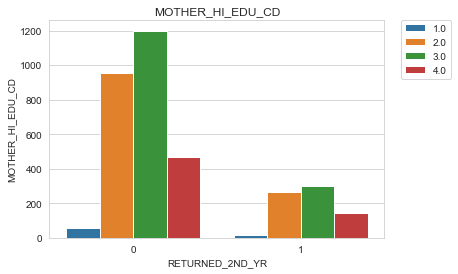

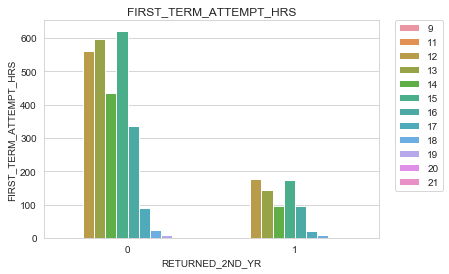

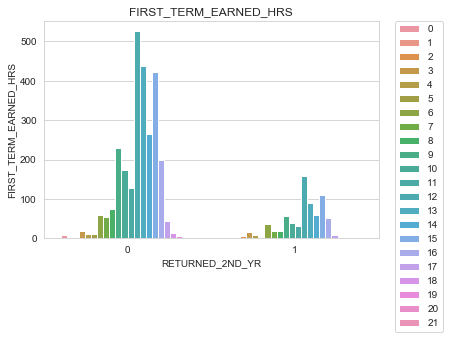

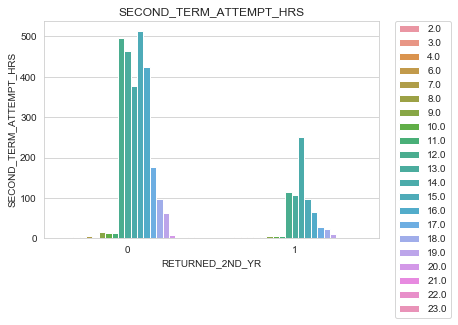

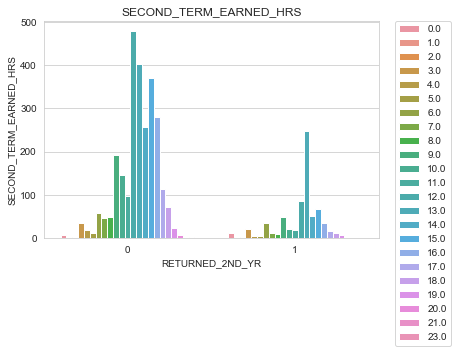

In [62]:
for feature in discrete_feature:
    data=data1.copy()
    plt.figure()
    sns.set_style('whitegrid')
    sns.countplot(x='RETURNED_2ND_YR',hue=feature,data=data1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('RETURNED_2ND_YR')
    plt.ylabel(feature)
    plt.title(feature)

In [63]:
## observation: Here also both the groups are behaving similar, except with slight variation in second term
## attempt and earned hours

data1.groupby("RETURNED_2ND_YR",as_index=False).agg({'SECOND_TERM_ATTEMPT_HRS':np.mean})

RETURNED_2ND_YR  SECOND_TERM_ATTEMPT_HRS
0                0                14.360239
1                1                13.929461

In [154]:
## Maybe students who have earned less hours are more likely to attrite

data1.groupby("RETURNED_2ND_YR",as_index=False).agg({'SECOND_TERM_EARNED_HRS':np.mean})

RETURNED_2ND_YR  SECOND_TERM_EARNED_HRS
0                0               12.729073
1                1               11.846473

In [65]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['STUDENT IDENTIFIER']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 6


In [66]:
continuous_feature

['DISTANCE_FROM_HOME',
 'HIGH_SCHL_GPA',
 'GROSS_FIN_NEED',
 'COST_OF_ATTEND',
 'EST_FAM_CONTRIBUTION',
 'UNMET_NEED']

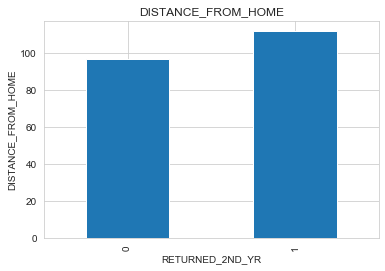

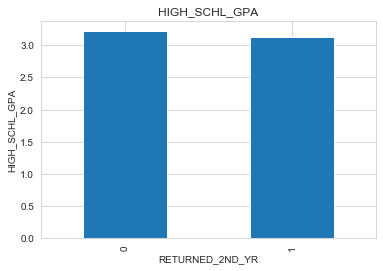

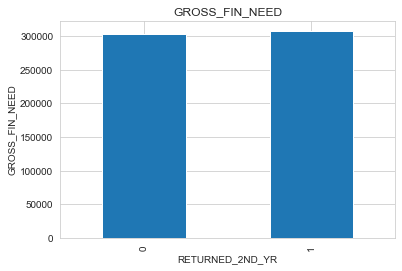

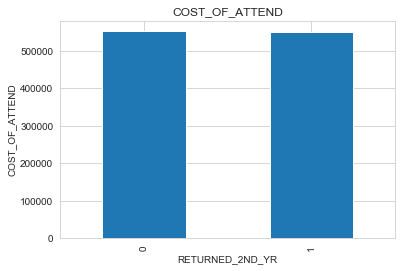

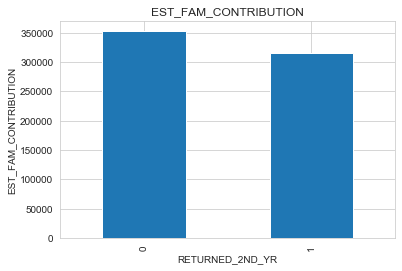

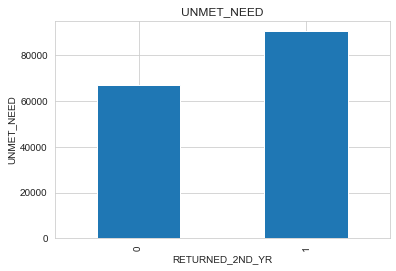

In [67]:
## Lets analyse the continuous values

for feature in continuous_feature:
    data=data1.copy()
    data.groupby('RETURNED_2ND_YR')[feature].mean().plot.bar()
    plt.xlabel('RETURNED_2ND_YR')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [68]:
##Observation: As evident from above graphs, groups behave differently for "Unmet Need", "Family contribution" 
## and distance from Home

data1.groupby("RETURNED_2ND_YR",as_index=False).agg({'UNMET_NEED':np.mean})

RETURNED_2ND_YR    UNMET_NEED
0                0  67260.278700
1                1  90679.460581

In [69]:
data1.groupby("RETURNED_2ND_YR",as_index=False).agg({'EST_FAM_CONTRIBUTION':np.mean})

RETURNED_2ND_YR  EST_FAM_CONTRIBUTION
0                0         352768.565022
1                1         315265.643154

In [70]:
data1.groupby("RETURNED_2ND_YR",as_index=False).agg({'DISTANCE_FROM_HOME':np.mean})

RETURNED_2ND_YR  DISTANCE_FROM_HOME
0                0           96.362855
1                1          111.616874

In [71]:
data1.groupby("RETURNED_2ND_YR",as_index=False).agg({'GROSS_FIN_NEED':np.mean})

RETURNED_2ND_YR  GROSS_FIN_NEED
0                0   302478.228700
1                1   307243.128631

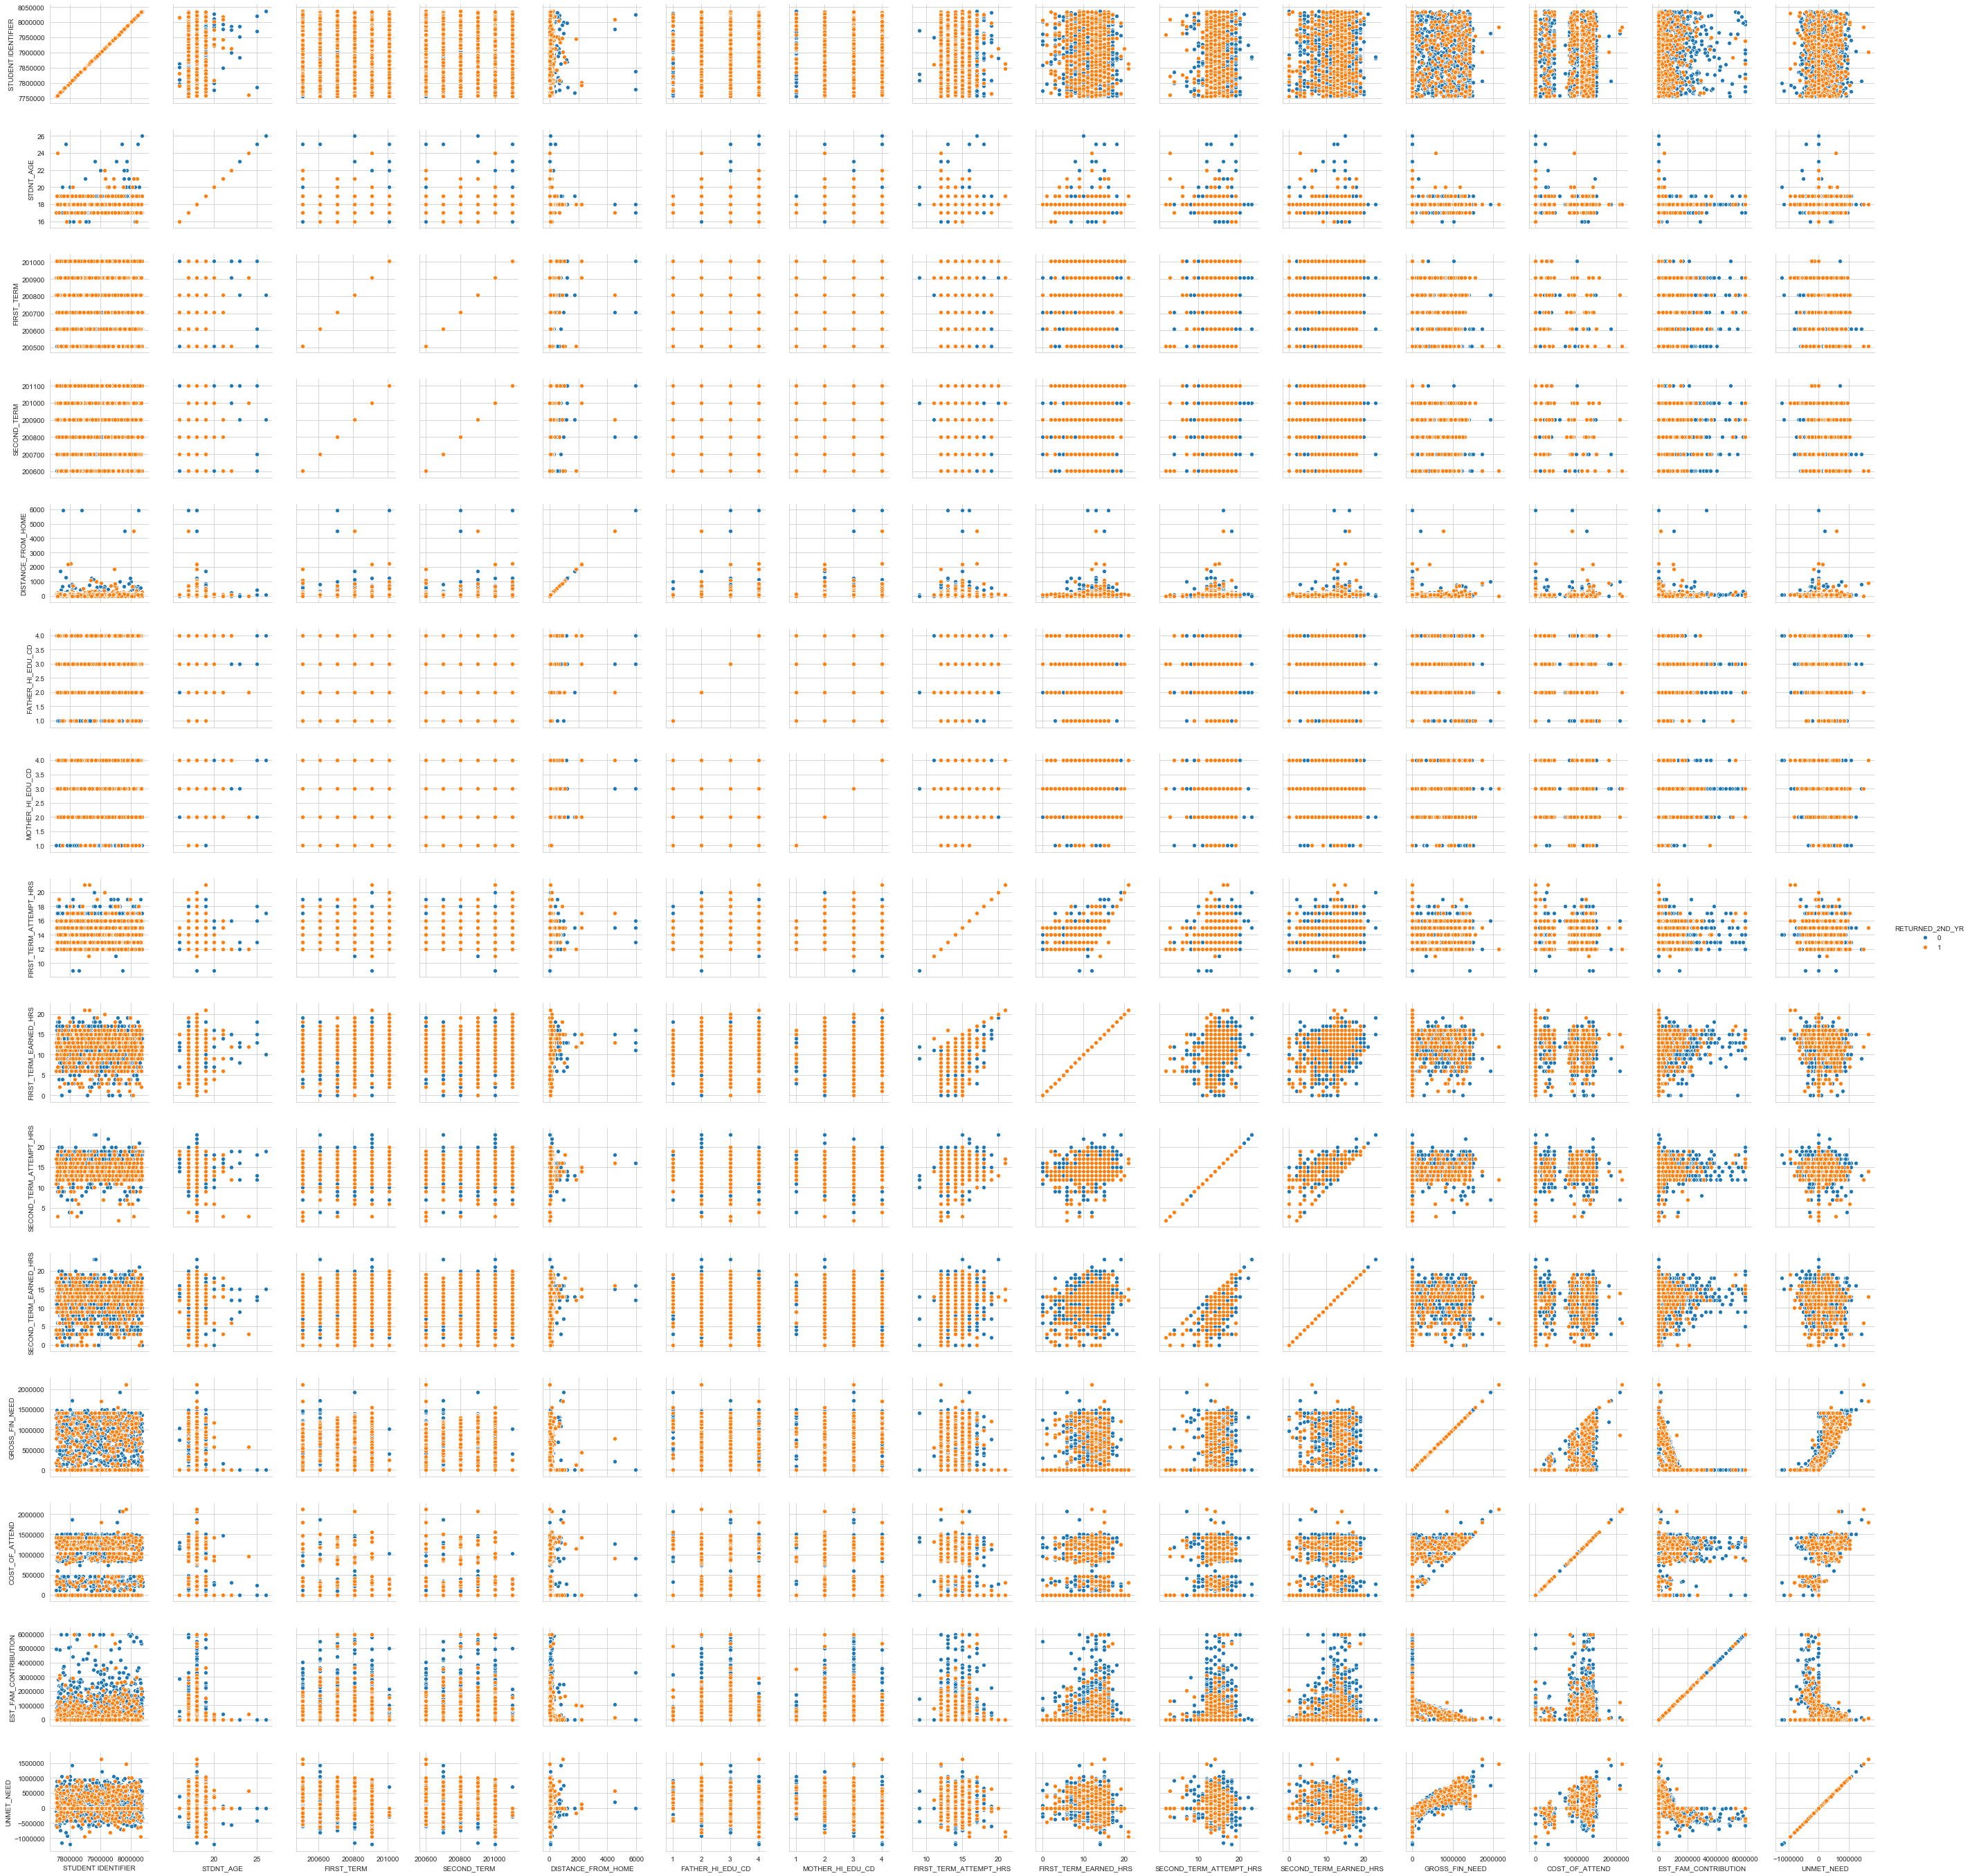

In [72]:
# General Overlook
sns.pairplot(data2,hue='RETURNED_2ND_YR',diag_kind=None)

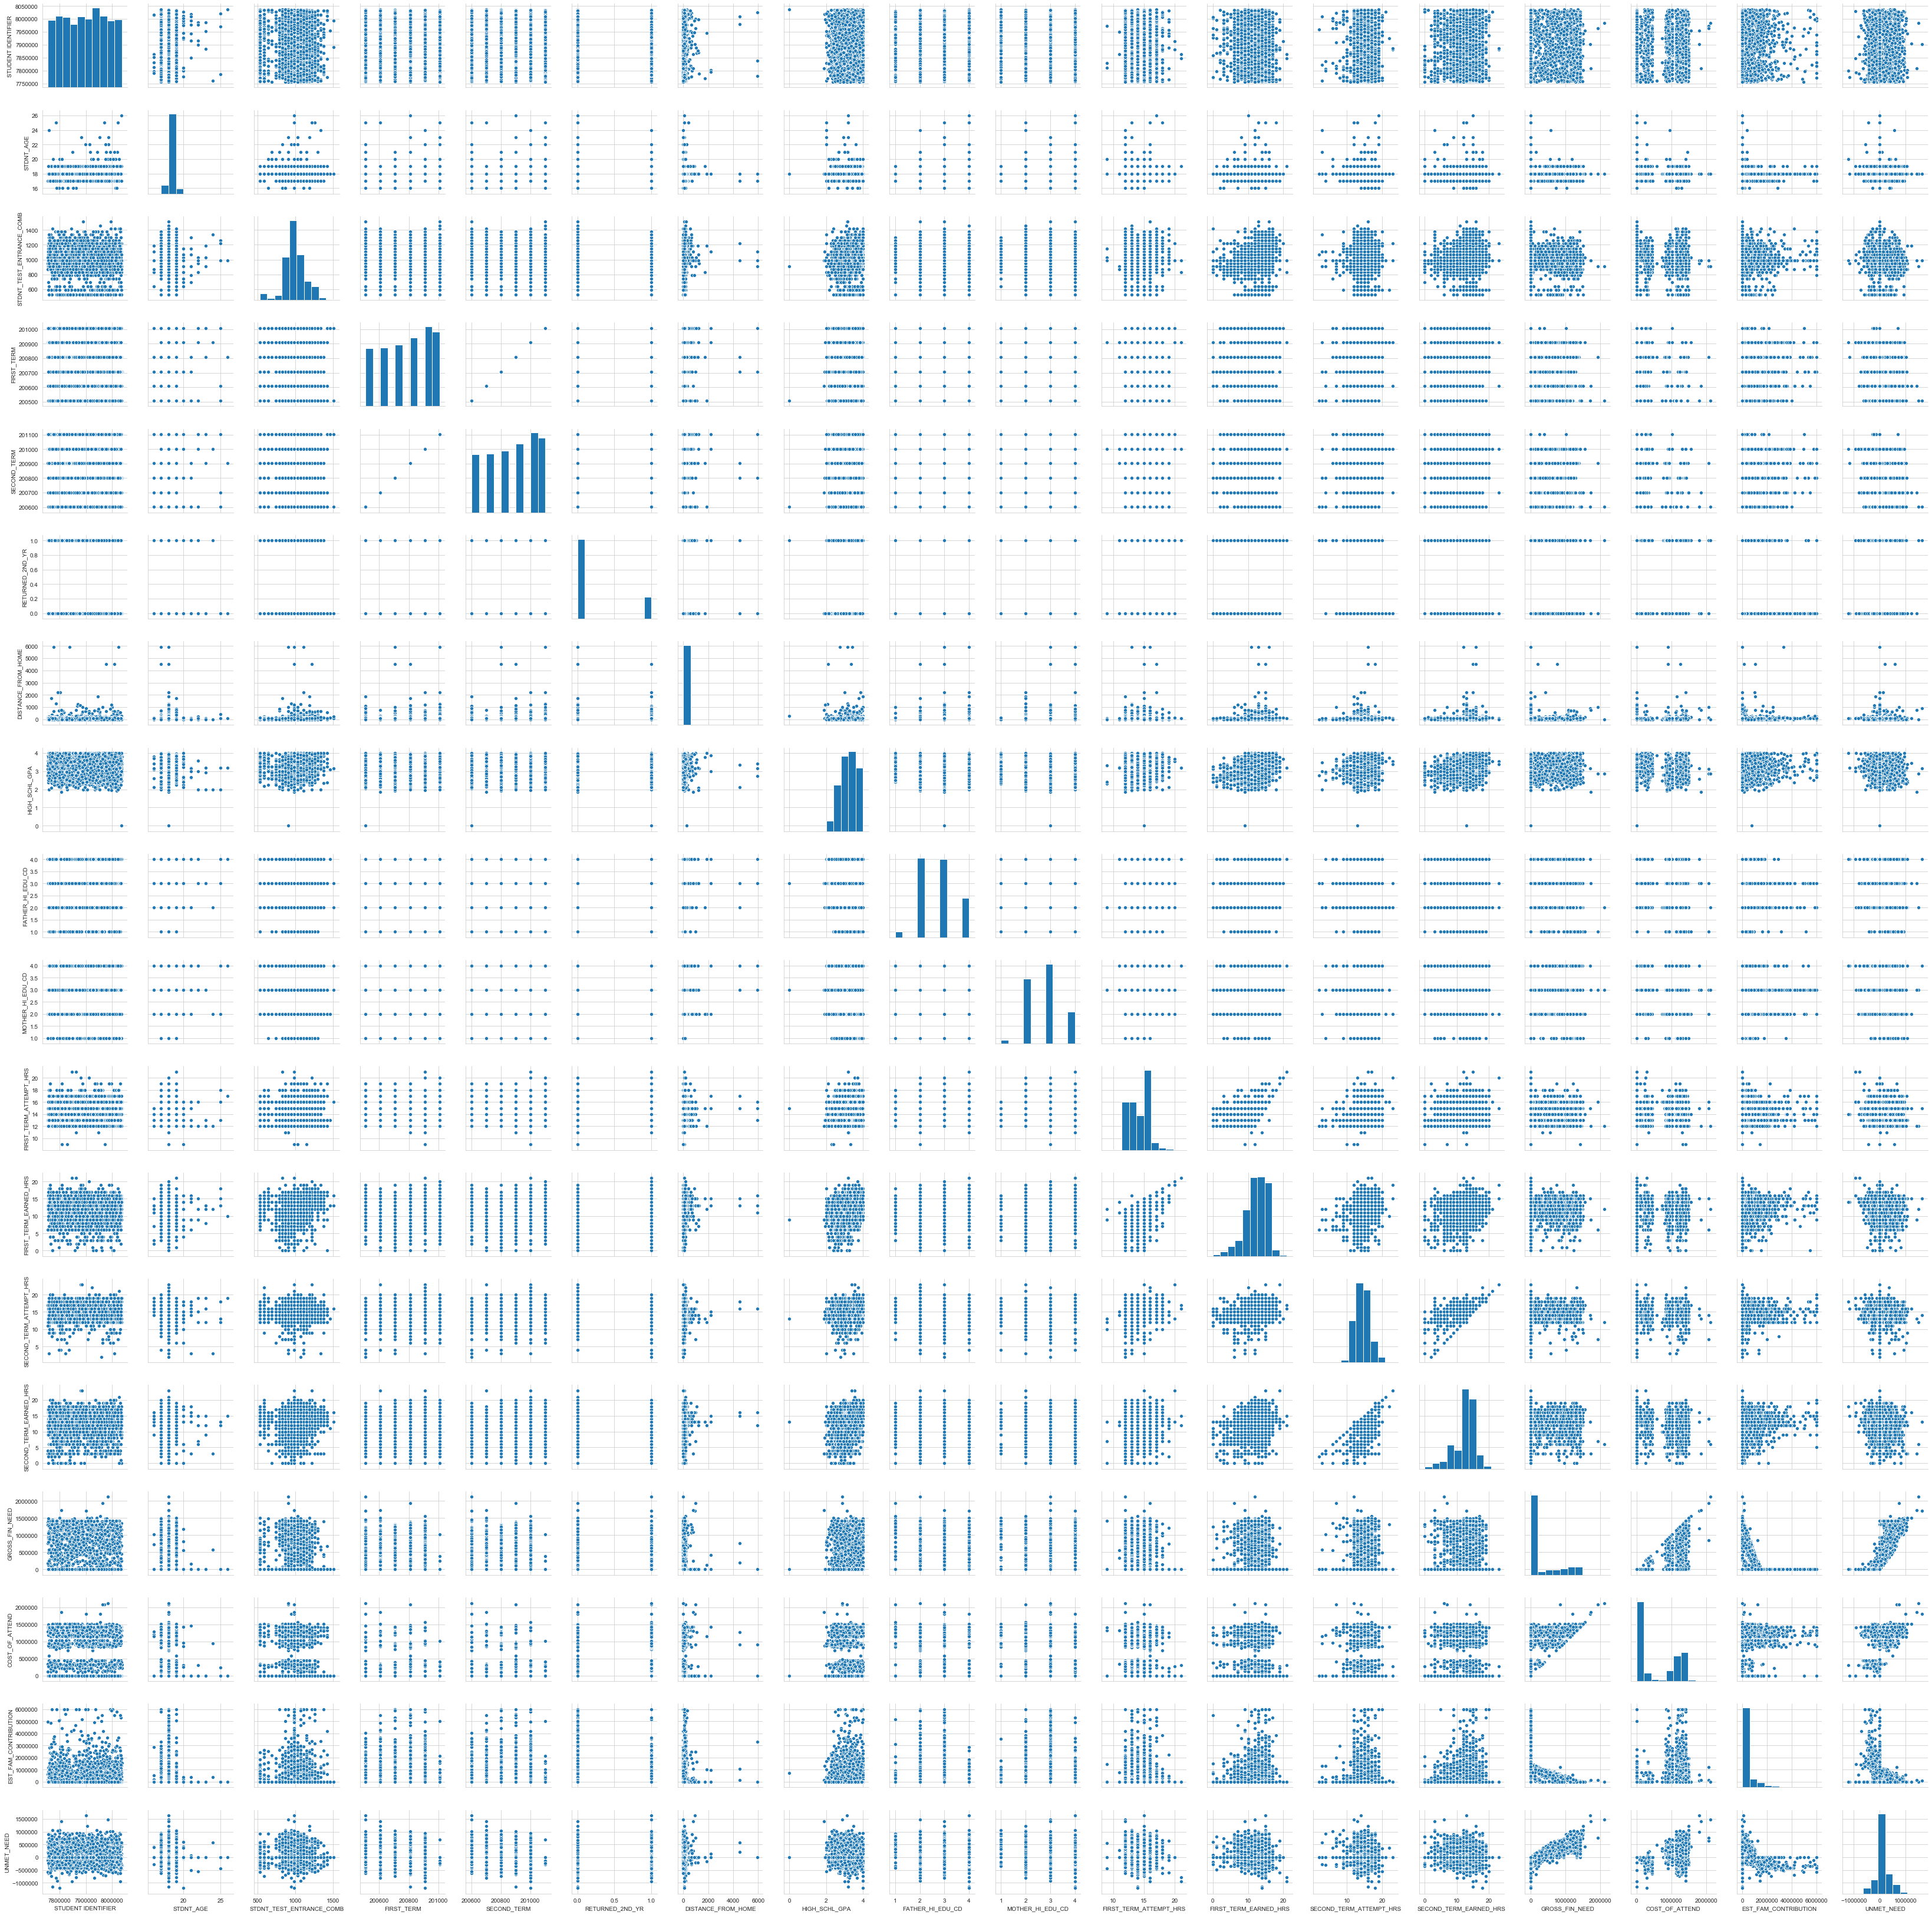

In [73]:
sns.pairplot(data1)

In [ ]:
## Students who attrite early have chosen following majors: Criminal Justice, Exercise Science, Art,
## computer science games,marketing,Engineering studies

In [108]:
data1[data1["RETURNED_2ND_YR"]==1].groupby("STDNT_MAJOR").agg("size").sort_values(ascending=False).head(15)

STDNT_MAJOR
Undeclared                   111
Biology                       82
Pre-Nursing                   47
Psychology                    43
Early Childhood Education     37
Nursing                       37
Pre-Business                  32
Criminal Justice              29
Exercise Science              19
Art                           18
Marketing                     15
Engineering Studies           15
Management                    15
Computer Science - Games      14
Political Science             14
dtype: int64

In [109]:
data1[data1["RETURNED_2ND_YR"]==0].groupby("STDNT_MAJOR").agg("size").sort_values(ascending=False).head(25)

STDNT_MAJOR
Undeclared                     349
Biology                        279
Early Childhood Education      153
Pre-Nursing                    130
Nursing                        127
Theatre Arts                   119
Psychology                     112
Pre-Business                   101
Music Education                 88
Music Performance               87
General Business                73
Criminal Justice                69
Exercise Science                62
Art                             57
Management                      57
Communication                   56
Chemistry                       54
English Language/Literature     51
Political Science               50
Computer Science - Systems      49
Engineering Studies             45
Marketing                       44
Health Science                  42
Accounting                      42
Joint Enrollment - Accel        35
dtype: int64

# Model Building

In [74]:
data3=data1.copy()

In [75]:
data3['HIGH_SCHL_GPA']=data3['HIGH_SCHL_GPA'].map(label)

In [76]:
data3['STDNT_TEST_ENTRANCE_COMB']=data3['STDNT_TEST_ENTRANCE_COMB'].map(label1)

In [77]:
## Deciding on XGBoost as final model as it has be best accuracy and recall %

### XGboost

In [164]:
X=data3.drop(['RETURNED_2ND_YR','STUDENT IDENTIFIER'],axis=1)
y=data3['RETURNED_2ND_YR']

In [165]:
X=pd.get_dummies(X)

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)

In [172]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [173]:
classifier=xgboost.XGBClassifier()

In [174]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [177]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,
                                 scoring='roc_auc',n_jobs=4,cv=5,verbose=3)

In [222]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.

In [223]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [225]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [224]:
clf=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1)

In [226]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [227]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X_train,y_train,cv=10)

In [219]:
score

array([0.81092437, 0.84453782, 0.82773109, 0.82352941, 0.84453782,
       0.81512605, 0.80672269, 0.80672269, 0.81932773, 0.84810127])

In [228]:
score.mean()

0.8301918235648689

In [229]:
score=cross_val_score(clf,X_test,y_test,cv=10)

In [230]:
score

array([0.83333333, 0.78431373, 0.7745098 , 0.81372549, 0.81372549,
       0.83333333, 0.80392157, 0.83333333, 0.82352941, 0.78431373])

In [231]:
score.mean()

0.8098039215686275

In [97]:
data3['RETURNED_2ND_YR'].value_counts()

0    2676
1     723
Name: RETURNED_2ND_YR, dtype: int64

In [99]:
#anyway 80% of data is 0
723/(2676+723)

0.21270962047661077

In [189]:
pred=clf.predict(X_test)

In [190]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [236]:
results = confusion_matrix(y_test, pred)

In [237]:
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[784  17]
 [159  60]]


In [238]:
print ('Accuracy Score :')
print(accuracy_score(y_test, pred))
print ('Report : ')
print (classification_report(y_test, pred))

Accuracy Score :
0.8274509803921568
Report : 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       801
           1       0.78      0.27      0.41       219

    accuracy                           0.83      1020
   macro avg       0.81      0.63      0.65      1020
weighted avg       0.82      0.83      0.79      1020



In [235]:
# As you can see recall value is very low, at 30%, it goes up to 50% if checked on train data.

In [211]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

In [195]:
from collections import Counter
Counter(y_test)

Counter({0: 801, 1: 219})

In [213]:
metrics.roc_auc_score(y_test, y_pred_proba)

0.7270079067831877

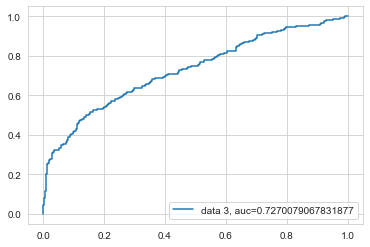

In [214]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 3, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [106]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [107]:
#Top 10 features
imp_feat.sort_values(ascending=False).head(10)

CORE_COURSE_NAME_1_S_Not picked    0.099641
CORE_COURSE_GRADE_1_S_NA           0.090950
CORE_COURSE_NAME_2_S_Not picked    0.017870
CORE_COURSE_GRADE_2_S_F            0.013874
CORE_COURSE_GRADE_1_S_C            0.013112
CORE_COURSE_GRADE_1_S_F            0.013035
CORE_COURSE_GRADE_2_S_D            0.011645
CORE_COURSE_GRADE_2_S_NA           0.010156
CORE_COURSE_GRADE_2_F_F            0.008588
CORE_COURSE_NAME_1_S_ENGL 1102     0.007982
dtype: float32

In [ ]:
#Observation: Students whose grades are low and/or when they don't opt enough subjects are more likely to attrite

## Gradient boosting 
### on data2 for getting variables other than grades and their direction

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
clf1=GradientBoostingClassifier(n_estimators=80,random_state=200)

In [112]:
X=data2.drop(['RETURNED_2ND_YR','STUDENT IDENTIFIER'],axis=1)
y=data2['RETURNED_2ND_YR']

In [113]:
X=pd.get_dummies(X)

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)

In [115]:
clf1.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=200, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [116]:
clf1.score(X_test,y_test)

0.7980392156862746

In [117]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "n_estimators" : [ 60,80,100,120,140,160]   
}

In [118]:
mod=RandomizedSearchCV(clf1,param_distributions=params,n_iter=5,n_jobs=-1,cv=5)
mod.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [119]:
mod.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=200, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [120]:
mod.best_params_

{'n_estimators': 80, 'max_depth': 6, 'learning_rate': 0.15}

In [121]:
clf1=GradientBoostingClassifier(n_estimators=80,max_depth=6,learning_rate=0.15,random_state=200)

In [122]:
clf1.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=200, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [123]:
clf1.score(X_test,y_test)

0.8127450980392157

In [124]:
pred1=clf1.predict(X_test)

In [125]:
results = confusion_matrix(y_test, pred1)

In [126]:
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[767  34]
 [157  62]]


In [127]:
print ('Accuracy Score :')
print(accuracy_score(y_test, pred1))
print ('Report : ')
print (classification_report(y_test, pred1))

Accuracy Score :
0.8127450980392157
Report : 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       801
           1       0.65      0.28      0.39       219

    accuracy                           0.81      1020
   macro avg       0.74      0.62      0.64      1020
weighted avg       0.79      0.81      0.78      1020



In [128]:
imp_feat1=pd.Series(clf1.feature_importances_,index=X.columns.tolist())

In [129]:
#Top 10 important features apart from grades, as you can observe, these variables are similar as observed from our EDA
imp_feat1.sort_values(ascending=False).head(10)

SECOND_TERM_ATTEMPT_HRS    0.156806
SECOND_TERM_EARNED_HRS     0.147783
FIRST_TERM_EARNED_HRS      0.045833
UNMET_NEED                 0.041223
DISTANCE_FROM_HOME         0.022817
GROSS_FIN_NEED             0.015409
FIRST_TERM_ATTEMPT_HRS     0.014449
EST_FAM_CONTRIBUTION       0.013800
COST_OF_ATTEND             0.012249
FIRST_TERM                 0.012208
dtype: float64

In [130]:
##Partial Dependence Plot
from sklearn.ensemble.partial_dependence import plot_partial_dependence

/Users/keivalypujara/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/Users/keivalypujara/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)


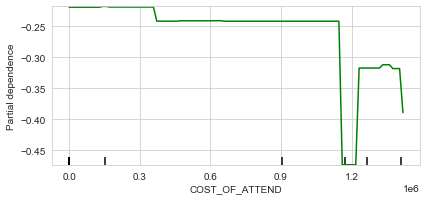

In [155]:
fig,axs=plot_partial_dependence(clf1, X, ['COST_OF_ATTEND'],feature_names=X.columns.tolist())

In [161]:
data2['COST_OF_ATTEND'].value_counts().head(-2)

0          1678
1418100     221
1176420      98
1146420      86
1306020      85
           ... 
357900        1
1019220       1
120060        1
347580        1
1119300       1
Name: COST_OF_ATTEND, Length: 118, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa270abf350>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa270ac7c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa270b017d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa270ac7c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa270ad9f10>],
 'means': []}

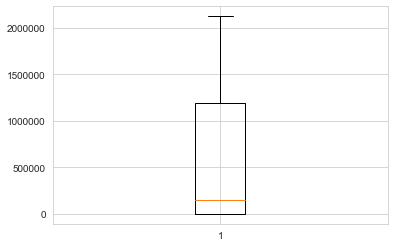

In [157]:
plt.boxplot(data2['COST_OF_ATTEND'])

## Decision Tree for getting some more idea on how features impact attrition

In [132]:
import sklearn.tree as tree
clf2=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.7833333333333333

In [135]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf2.predict_proba(X_test)[:,1])

0.6414441993170635

In [136]:
import sklearn.model_selection as model_selection
mod=model_selection.GridSearchCV(clf2,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=200,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs'

In [137]:
mod.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=200, splitter='best')

In [138]:
clf2=tree.DecisionTreeClassifier(max_depth=5,random_state=200)
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.8088235294117647

In [139]:
metrics.roc_auc_score(y_test,clf2.predict_proba(X_test)[:,1])

0.6419059508947149

In [140]:
import pydotplus

In [141]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [142]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [143]:
from IPython.display import Image

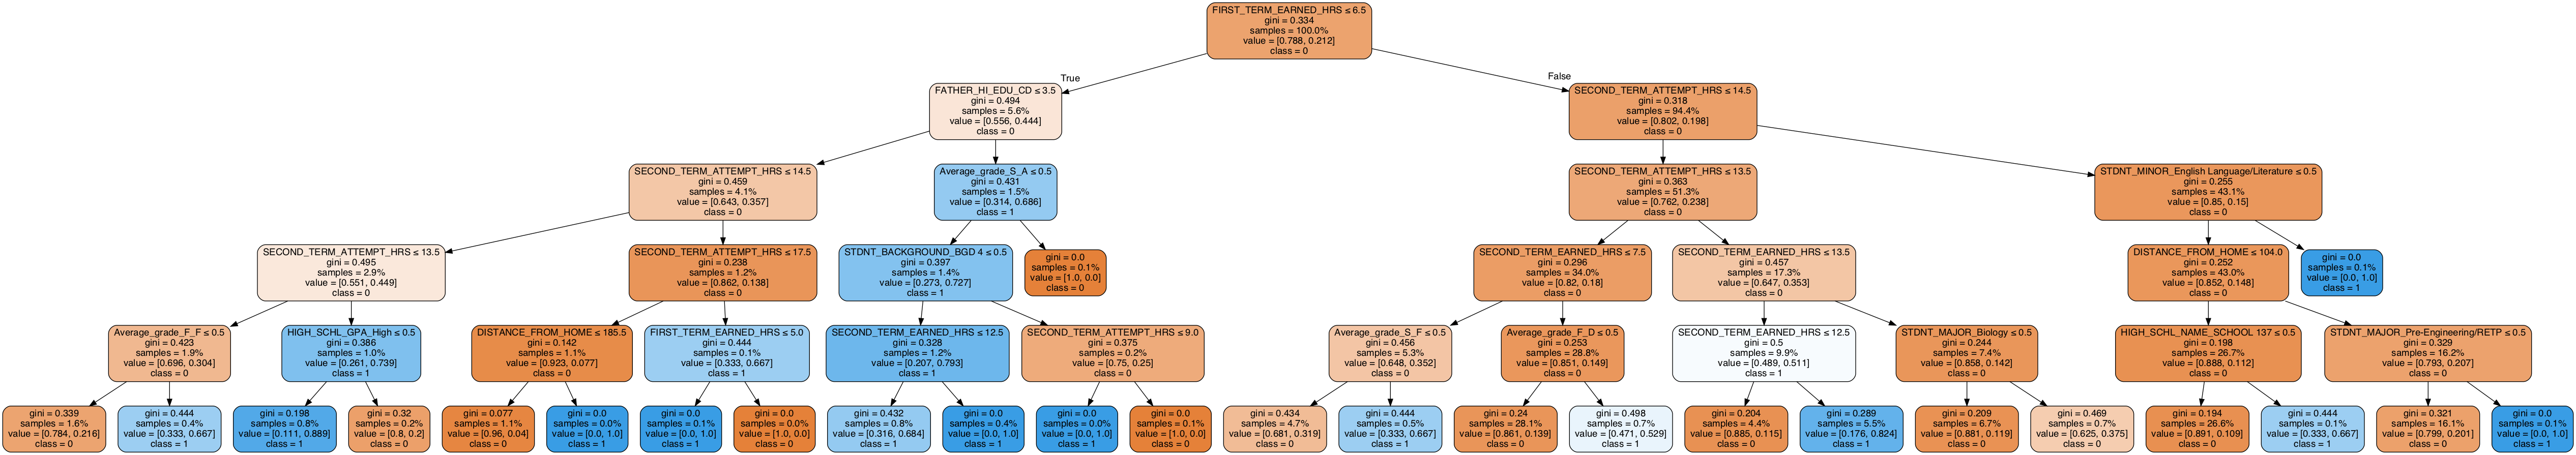

In [144]:
Image(graph.create_png())

In [149]:
data2.to_csv(r'/Users/keivalypujara/Desktop/Jigsaw/Python/Capstone/Data2.csv',header=True,index=False)

In [162]:
data1.to_csv(r'/Users/keivalypujara/Desktop/Jigsaw/Python/Capstone/Data1.csv',header=True,index=False)